# Assignment Goals

Assignment 5 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

You need to submit a zip file in the usual format containing the following:

- PDF document explaining your solutions for each of the problems.  
  - At most one page outlining your overall approach: how have you defined the gradient descent function, what functions can it take as inputs, are there any restrictions on the type of function etc.
  - Not more than 1 page per problem.  Only explain anything that is not obvious.  Even a single line is acceptable if you have otherwise explained the overall approach before.  Explain your choice of starting point if relevant.
  - The doc for each problem should also contain an image showing the points you started with and how the convergence occurs.  For the 2-D images, you need to generate a 3-D plot.  Refer to the matplotlib documentation for this.
- Python code containing:
  - the functions below with the same names (`f1`, `f2` etc).
  - derivatives of the functions if not already given

In [2]:
%matplotlib ipympl
# The following imports are assumed for the rest of the problems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

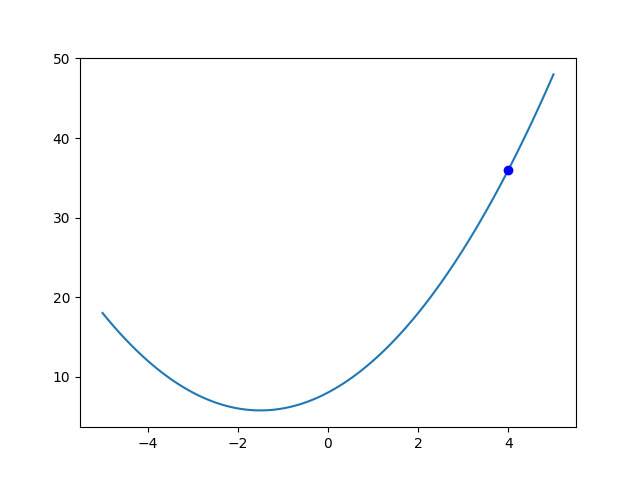

In [7]:
%matplotlib ipympl
def f1(x):
    return x ** 2 + 3 * x + 8
def f1_dx(x):
    return 2 * x + 3

def generic(function, derivative,frange,bestx,learningrate):
    xbase = np.linspace(frange[0],frange[1],100)
    ybase = function(xbase)

    best_x = bestx
    bestcost = function(best_x)
    rangemin, rangemax = frange[0], frange[1]

    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    ax.plot(best_x, bestcost, 'bo',label = 'starting point')
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro-',label = 'convergence')
    lngood, = ax.plot([], [], 'go', markersize=10, label = 'optimized point')

    lr = learningrate

    def onestepderiv(frame):
        nonlocal bestcost, bestx, lr
        xall.append(bestx)
        yall.append(function(bestx))
        x = bestx - derivative(bestx) * lr 
        bestx = x
        y = function(x)
        lngood.set_data(x, y)
        lnall.set_data(xall, yall)
      
    ani= FuncAnimation(fig, onestepderiv, frames=range(50), interval=1000, repeat=False)
    # ani.save('prob1.gif', writer = 'pillow',fps=50) 
    return ani

ani = generic(f1,f1_dx,[-5,5],4,0.05)
plt.show()
plt.legend()

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [39]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D
# The following imports are assumed for the rest of the problems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

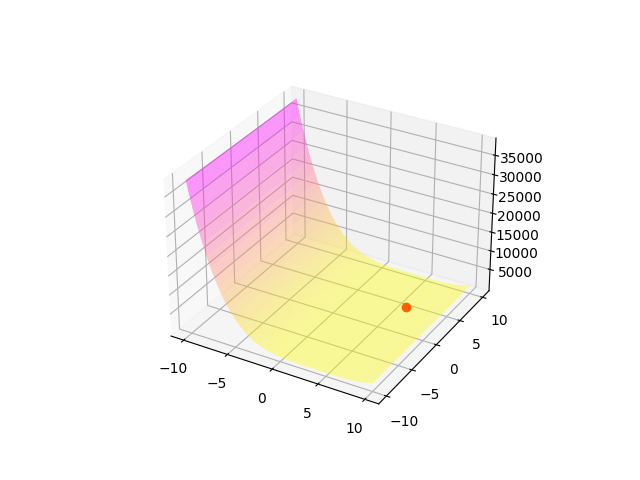

In [15]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]

%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

# offset_x = -1
# offset_y = 10
# offset_z = 20
# def display_optimized_values(x, y, z):
#     text = f'x = {x:.2f}\ny = {y:.2f}\nz = {z:.2f}'
#     text_x = x + offset_x
#     text_y = y + offset_y
#     text_z = z + offset_z
#     ax.text(text_x, text_y, text_z, text, fontsize=10, color='green')
    
def generic(function, derivative_x, derivative_y, frange, best_x, best_y,learningrate):
    xbase = np.linspace(frange[0], frange[1], 100)
    ybase = np.linspace(frange[0], frange[1], 100)
    xbase, ybase = np.meshgrid(xbase, ybase)
    zbase = function(xbase, ybase)

    # Set up some initial values
    bestx = best_x
    besty = best_y
    bestcost = f3(bestx, besty)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    rangemin, rangemax = frange[0], frange[1]
    ax.plot_surface(xbase, ybase, zbase, cmap='spring_r', alpha = 0.4)


    xall, yall, zall = [bestx], [besty], [bestcost]
    lnall, = ax.plot([bestx], [besty], [bestcost], 'ro-', label = 'convergence')


    # Learning rate
    lr = learningrate

    def onestepderiv(frame):
        nonlocal bestcost, bestx, besty, lr
        xall.append(bestx)
        yall.append(besty)
        z = f3(bestx, besty)
        zall.append(z)  # Store the z value
        bestcost = z  # Update bestcost with the current cost
        x = bestx - df3_dx(bestx, besty) * lr
        y = besty - df3_dy(bestx, besty) * lr
        bestx = x
        besty = y

        # Update the data of lnall for the 3D line plot
        lnall.set_data(xall, yall)
        lnall.set_3d_properties(zall)

        if frame == 99:
            ax.scatter([bestx], [besty], [bestcost], color='green', marker='o', s=100, label = 'optimized point')
            display_optimized_values(bestx, besty, bestcost)

# Create an animation object
    ani = FuncAnimation(fig, onestepderiv, frames=range(100), interval=1000, repeat=False)
    return ani

ani = generic(f3, df3_dx, df3_dy, [-10,10],6,4,0.05)
plt.show()
plt.legend()
# plt.savefig('prob2.png')
# ani.save('prob2.gif',writer = 'pillow', fps=5) 

## Problem 3 - 2-D function 

Derivatives and limits given. 

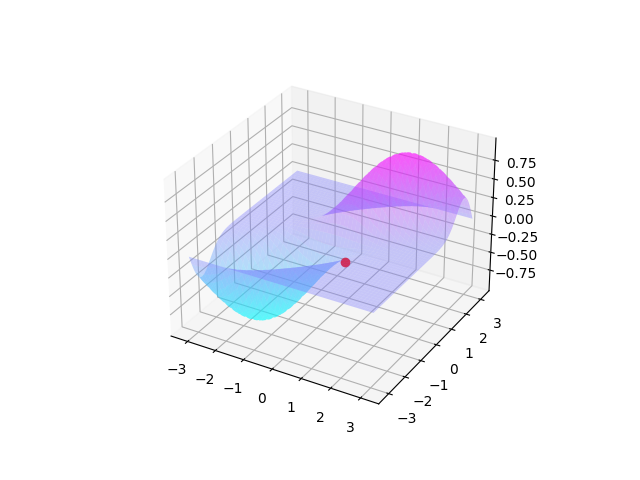

In [13]:
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

xlim4 = [-np.pi, np.pi]
def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)

offset_x = 2
offset_y = 2
offset_z = 2
def display_optimized_values(x, y, z):
    text = f'x = {x:.2f}\ny = {y:.2f}\nz = {z:.2f}'
    text_x = x + offset_x
    text_y = y + offset_y
    text_z = z + offset_z
    ax.text(text_x, text_y, text_z, text, fontsize=10, color='green')
    
xbase = np.linspace(-np.pi, np.pi, 100)
ybase = np.linspace(-np.pi, np.pi, 100)
xbase, ybase = np.meshgrid(xbase, ybase)
zbase = f4(xbase, ybase)

# Set up some initial values
bestx = 1
besty = -1
bestcost = f4(bestx, besty)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rangemin, rangemax =  -np.pi, np.pi
ax.plot_surface(xbase, ybase, zbase, cmap='cool' , alpha = 0.4)


xall, yall, zall = [bestx], [besty], [bestcost]
lnall, = ax.plot([bestx], [besty], [bestcost], 'ro-',label = 'convergence')


# Learning rate
lr = 0.1

def onestepderiv(frame):
    global bestcost, bestx, besty, lr
    xall.append(bestx)
    yall.append(besty)
    z = f4(bestx, besty)
    zall.append(z)  # Store the z value
    bestcost = z  # Update bestcost with the current cost
    x = bestx - df4_dx(bestx, besty) * lr
    y = besty - df4_dy(bestx, besty) * lr
    bestx = x
    besty = y

    # Update the data of lnall for the 3D line plot
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)
    
    if frame == 99:
        ax.scatter([bestx], [besty], [bestcost], color='green', marker='o', s=100, label = 'optimized point')
        display_optimized_values(bestx, besty, bestcost)

# Create an animation object
ani = FuncAnimation(fig, onestepderiv, frames=range(100), interval=1000, repeat=False)
plt.show()
plt.legend()
# plt.savefig('prob31.png')

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

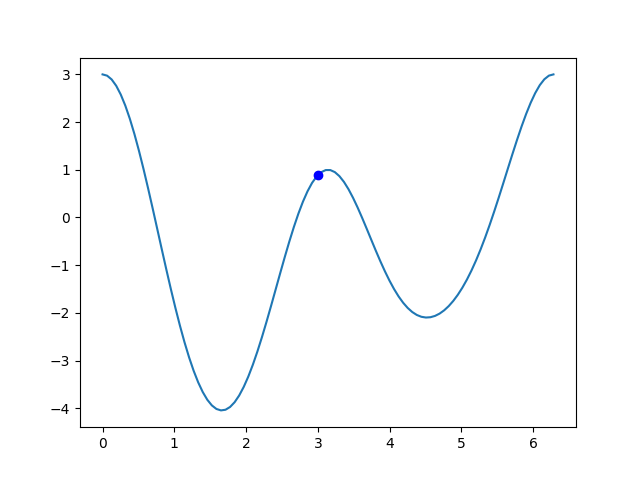

In [57]:
def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1
def f5_dx(x):
    return (-4) * (np.cos(x)**3) * (np.sin(x)) - 3 * np.sin(x)**2 * np.cos(x) - 8 * np.sin(x) *np.cos(x) - np.sin(x)

xbase = np.linspace(0,2*np.pi,100)
ybase = f5(xbase)
# plt.plot(xbase, ybase)
# plt.show()

bestcost = 100000

bestx = 3
bestcost = f5(bestx)
rangemin, rangemax = 0, 2*np.pi

fig, ax = plt.subplots()
ax.plot(xbase, ybase)
ax.plot(bestx, bestcost,'bo', label = 'starting point')
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro-', label = 'convergence')
lngood, = ax.plot([], [], 'go', markersize=10, label = 'optimized point')

lr = 0.01

def onestepderiv(frame,function,derivative):
    global bestcost, bestx, lr
    xall.append(bestx)
    yall.append(function(bestx))
    x = bestx - derivative(bestx) * lr 
    bestx = x
    y = function(x)
    lngood.set_data(x, y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(50),fargs = (f5,f5_dx,), interval=1000, repeat=False)
plt.show()
plt.legend()
# plt.savefig('prob41.png')
# ani.save('prob42.gif', writer = 'pillow', fps = 5)

## Work expectations

- Implementing basic gradient descent (based on code already discussed in class): ~30-60m
- Identifying gradients for problems 1, 4: ~10m each
- Matplotlib documentation for 3-D plots: ~30m
- Documentation: ~30m

Total expected time for this assignment is about 2 hours.  If you find yourself spending much more than that you need to contact the instructor and discuss the reasons.